# **MODEL EXPLAINABILITY**

GROUP 7
1. DIONISIO, GERYCO
2. NAVARRO, CARL
3. QUE, MICHAEL DAVE
4. TAGABUCBA, HANZ ADRIAN

This assignment focuses on exploring explainability methods for machine learning models. We worked with the Telco Churn dataset from Module 5 and a pre-trained Random Forest classifier for predicting customer churn.

Objectives

* Understand and implement explainability methods for machine learning models (SHAP, LIME, PDP).
* Analyze the key drivers impacting the Random Forest classifier's performance on the Telco Churn dataset.
* Document our analysis process and key findings.

Requirements
* Preparation
 * Review the provided repositories containing implementations of SHAP, LIME, and PDP. Make sure we understand the theory and functionality of these methods.
 * Download the Telco Churn dataset used in Module 5.
 * Ensure we have access to a Python environment with the necessary libraries installed (libraries for the explainability methods and the Telco Churn dataset processing).

* Implementation
 1. Train a Random Forest classifier on the Telco Churn dataset (if not already provided).
 2. AS A GROUP: Implement the following explainability methods:
   * SHAP (SHapley Additive exPlanations)
   * LIME (Local Interpretable Model-agnostic Explanations)
   * PDP (Partial Dependence Plot)
 3. Apply our chosen method to explain the predictions of the Random Forest classifier for the Telco Churn dataset.
 4. Identify the top 3-5 features with the most significant impact on the model's predictions (positive or negative influence on churn prediction).

Analysis & Reporting

 1. Document each step of our analysis. This includes:
  * Code snippets demonstrating the implementation of the chosen explainability method.
  * Visualization of the explanation results for individual data points (SHAP, LIME) or for specific features (PDP).
  * Explanation of how you identified the top features impacting the model's predictions.
 2. Describe the key insights we gained from the chosen explainability method. For example:
  * Did the chosen method highlight any unexpected feature importance?
  * How do the explanations align with your understanding of the Telco Churn domain?
 3. Summarize oyur findings in a clear and concise report format. Include all necessary code, visualizations, and your explanations.
Submission

By completing this assignment, we gained valuable experience in applying explainability methods to understand the inner workings of machine learning models. This will allowed us to better interpret and trust the predictions made by these models

#**Step 1: Preparation**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import all the necessary libraries

In [ ]:
#Important Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

#For Visualization
sns.set_style('whitegrid')
sns.set_palette('Set2')
sns.color_palette('Set2')
dlsu_green = "#117a65ff"

In [ ]:
file_path = '/content/drive/Shareddrives/DATA103_DATA/WA_Fn-UseC_-Telco-Customer-Churn-1.csv'


df = pd.read_csv(file_path)

In [ ]:
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [ ]:
df['OnlineBackup']

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
7038     No
7039    Yes
7040     No
7041     No
7042     No
Name: OnlineBackup, Length: 7043, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Drop customerID since it is an identifier and not a feature



In [ ]:
churn_model_data = df.copy(deep=True)

churn_model_data.drop('customerID', inplace=True, axis=1)

Convert gender to numeric data

In [ ]:
churn_model_data.gender = churn_model_data.gender.apply(lambda x: 1 if x == 'Male' else 0)

In [ ]:
from sklearn.impute import KNNImputer


numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
imputer = KNNImputer(n_neighbors=5) #estimate the value of missing data based on the ave their 5 nearest neighbors

df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

In [ ]:
df = df.drop(columns="id") #drop ID col since it is not relevant to the model.
df['gender'] = df['gender']. apply(lambda x: 1 if x == "Male" else 0) #convert gender, married status, and residence data to numerical/ binary
df['ever_married'] = df['ever_married']. apply(lambda x: 1 if x == "Yes" else 0)
df['Residence_type'] = df['Residence_type']. apply(lambda x: 1 if x == "Urban" else 0)

In [ ]:
multi_features = ['work_type','smoking_status'] #use one hot encoding on features that have multiple categories
encoder = OneHotEncoder(handle_unknown='ignore')
multi_encoded = encoder.fit_transform(df[multi_features]) # Convert the categorical features into a one-hot encoded matrix
multi_df = pd.DataFrame(multi_encoded.todense(), columns=encoder.get_feature_names_out())
multi_df = multi_df.astype(int) #Convert the one-hot encoded columns to integers

df.drop(multi_features, axis=1, inplace=True)
df = pd.concat([df, multi_df], axis=1)
df.head()

Convert object features in the dataset to numeric data and TotalCharges to float

In [ ]:
for object_feature in ['Partner', 'Dependents', 'PhoneService',
                     'PaperlessBilling', 'OnlineSecurity', 'OnlineBackup',
                     'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn']:
  churn_model_data[object_feature] = churn_model_data[object_feature]. apply(lambda x: 1 if x == "Yes" else 0)



In [ ]:
churn_model_data.TotalCharges = pd.to_numeric(churn_model_data.TotalCharges, errors='coerce')
churn_model_data.TotalCharges = churn_model_data.TotalCharges.fillna(value=-1)

Use one hot enconding on features with multiple categories

In [ ]:
multi_features = ['InternetService', 'Contract', 'PaymentMethod', 'MultipleLines']
encoder = OneHotEncoder(handle_unknown='ignore')
multi_encoded = encoder.fit_transform(churn_model_data[multi_features])
multi_df = pd.DataFrame(multi_encoded.todense(), columns=encoder.get_feature_names_out())
multi_df = multi_df.astype(int)

churn_model_data.drop(multi_features, axis=1, inplace=True)
churn_model_data = pd.concat([churn_model_data, multi_df], axis=1)
churn_model_data.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  ...  \
0               0             1                 0            0  ...   
1               1             0                 1            0  ...   
2               1             1                 0            0  ...   
3               1             0                 1            1  ...   
4               0             0                 0            0  ...   

   Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                        1                  0                  0   
1                        0                  1                  0   
2                        1                  0                  0   
3                        0                  1                  0   
4                        1                  0                  0   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  MultipleLines_No  \
0                           0                 0   
1                           1                 1   
2                           1                 1   
3                           0                 0   
4                           0                 1   

   MultipleLines_No phone service  MultipleLines_Yes  
0                               1                  0  
1                               0                  0  
2                               0                  0  
3                               1                  0  
4                               0                  0  

[5 rows x 29 columns]

In [ ]:
churn_model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   OnlineSecurity                           7043 non-null   int64  
 7   OnlineBackup                             7043 non-null   int64  
 8   DeviceProtection                         7043 non-null   int64  
 9   TechSupport                              7043 non-null   int64  
 10  StreamingTV                              7043 no

#**Step 2: Implementation**

**RANDOM FOREST**

In [ ]:
# Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
X = churn_model_data.drop('Churn', axis=1)
y = churn_model_data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X.shape)
print(y.shape)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(7043, 28)
(7043,)
(5634, 28)
(1409, 28)
(5634,)
(1409,)


In [ ]:
randomforest_model = RandomForestClassifier(n_estimators=100, random_state=42)
randomforest_model.fit(X_train, y_train)
y_pred = randomforest_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.7892122072391767
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.64      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



**SHAP**

SHAP (SHapley Additive exPlanations) is a method to explain individual predictions. The goal of SHAP is to explain the prediction of an instance x by computing the contribution of each feature to the prediction. The SHAP explanation method computes Shapley values from coalitional game theory. The feature values of a data instance act as players in a coalition. Shapley values tell us how to fairly distribute the "payout" among the features. A player can be an individual feature value, e.g. for tabular data

In [ ]:
# import the packages
import shap
shap.initjs()

In [ ]:
# Create a SHAP explainer for the random forest model and compute SHAP values for the test dataset
explainer = shap.TreeExplainer(randomforest_model)
shap_values = explainer.shap_values(X_test)

To identify the top features impacting the SHAP model's predictions, the following steps and visualizations took place:
1. Summary plot of Features with highest absolute SHAP Values
 * Shapley values are rooted in cooperative game theory and are used to fairly distribute a "payout" (in this case, the model's prediction) among various "players" (features). Each feature is considered as a "player" in a coalition that contributes to the final prediction.
 * By visualizing the distribution of SHAP values for each feature, the summary plot helps us identify which features consistently contribute the most to the model's predictions.
2. Waterfall Plot on cumulatively contribution of the top features to the final prediction
 * Shapley values provide a detailed attribution by calculating how much each feature shifts the prediction from the baseline (the average prediction) to the final predicted value.
 * The waterfall plot effectively represents this by showing the cumulative sum of feature contributions, in order of their importance.

*1. Summary plot of Features with highest absolute SHAP Values*

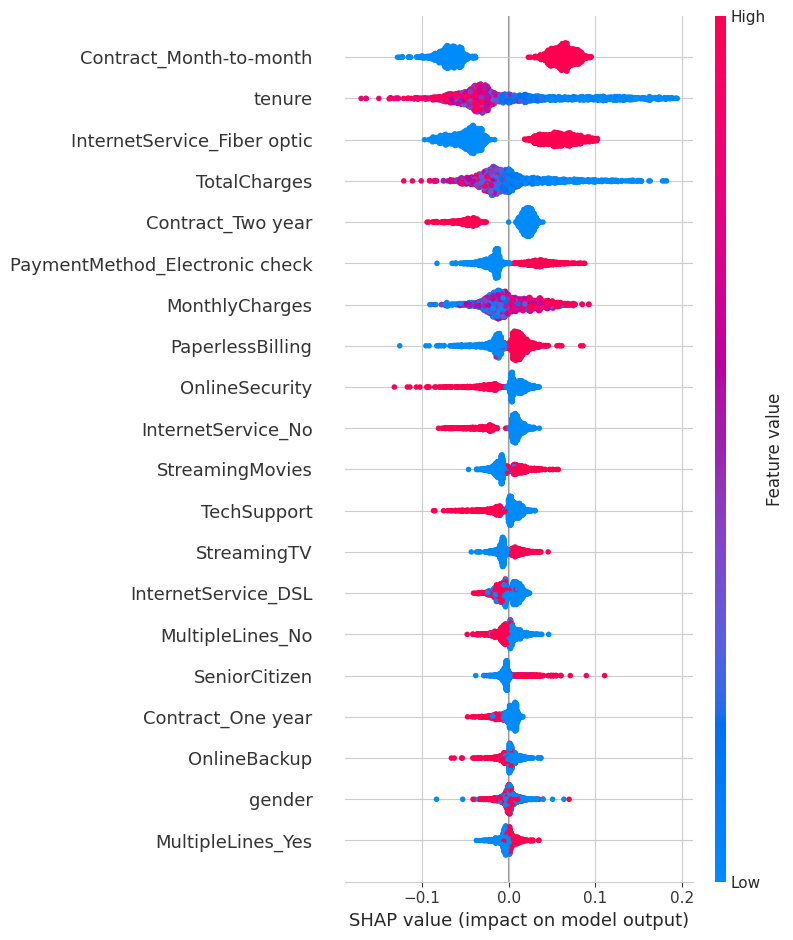

In [ ]:
# Select SHAP values for the "churned" class and generate a summary plot for feature importance in predicting churn

samples = X_test

shap_values_for_class_1 = shap_values[:, :, 1]

shap.summary_plot(shap_values_for_class_1, samples)

#Purpose The summary plot shows the distribution of SHAP values for each feature, helping us understand which features have the most influence on the churn prediction. Features with large absolute SHAP values have a higher impact on the model’s output, whether positive or negative.

**INTERPRETATION**

This SHAP summary plot provides an interpretation of feature importance and how different values of each feature affect the model's predictions.

1. **Feature Ranking by Importance:** The features are ranked by importance from top to bottom, with the most impactful features at the top. In this case, the most significant features for predicting the target class are: Contract_Month-to-month, tenure, and InternetService_Fiber optic

2. **Color Gradient and Feature Values:**
 * The color gradient from blue to red shows the value of each feature for each data point  in the test set. Blue typically represents lower feature values, and red represents higher feature values.
 * For instance, for Contract_Month-to-month, the red points (higher values) are spread more toward positive SHAP values, suggesting that having a month-to-month contract increases the likelihood of the positive class. In contrast, lower values (blue points) do not have the same positive impact on the prediction.

*2. Waterfall Plot on cumulatively contribution of the top features to the final prediction*

In [ ]:
# This function calculates and visualizes the feature importance ratios and cumulative importance for a selected number of top features.
# Explanation: The make_shap_waterfall_plot function: (!) Calculates the total importance of each feature by summing the absolute SHAP values across all samples, (2) Ranks features by their relative contribution to the churn prediction., (3) Visualizes both individual feature contributions (bars) and cumulative importance (line) in a waterfall plot, which helps in identifying the most impactful features in terms of their effect on churn prediction.

def make_shap_waterfall_plot(shap_values, features, num_display=20):
  column_list = features.columns
  feature_ratio = (np.abs(shap_values).sum(0) / np.abs(shap_values).sum()) * 100
  column_list = column_list[np.argsort(feature_ratio)[::-1]]
  feature_ratio_order = np.sort(feature_ratio)[::-1]
  cum_sum = np.cumsum(feature_ratio_order)
  column_list = column_list[:num_display]
  feature_ratio_order = feature_ratio_order[:num_display]
  cum_sum = cum_sum[:num_display]

  num_height = 0
  if (num_display >= 20) & (len(column_list) >= 20):
    num_height = (len(column_list) - 20) * 0.4

  fig, ax1 = plt.subplots(figsize=(8, 8 + num_height))
  ax1.plot(cum_sum[::-1], column_list[::-1], c='blue', marker='o')
  ax2 = ax1.twiny()
  ax2.barh(column_list[::-1], feature_ratio_order[::-1], alpha=0.6)

  ax1.grid(True)
  ax2.grid(False)
  ax1.set_xticks(np.arange(0, round(cum_sum.max(), -1)+1, 10))
  ax2.set_xticks(np.arange(0, round(feature_ratio_order.max(), -1)+1, 10))
  ax1.set_xlabel('Cumulative Ratio')
  ax2.set_xlabel('Composition Ratio')
  ax1.tick_params(axis="y", labelsize=13)
  plt.ylim(-1, len(column_list))

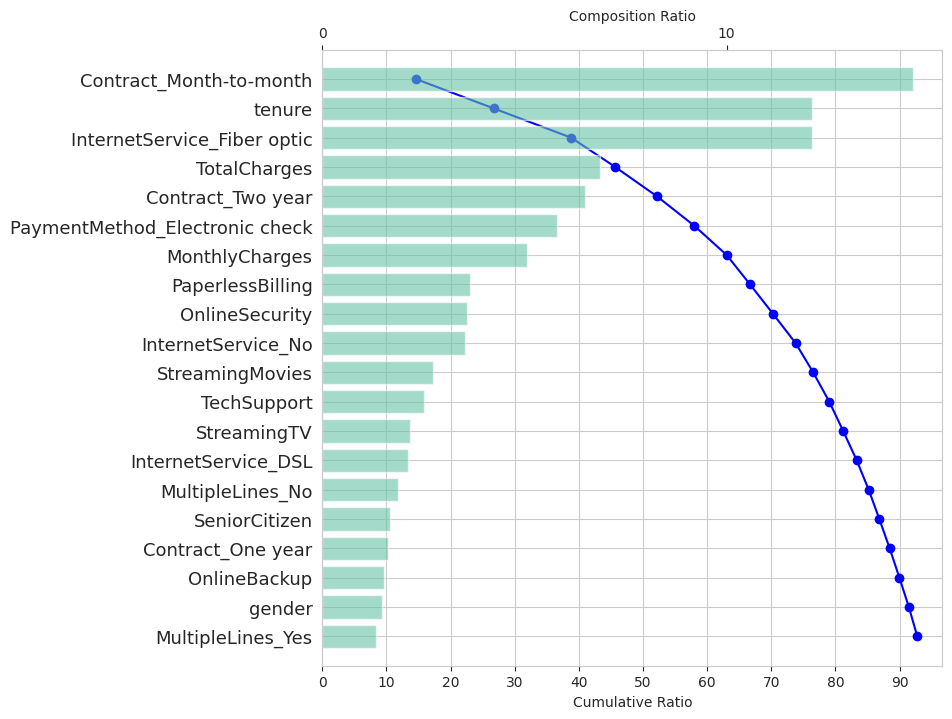

In [ ]:
# Generate a SHAP waterfall plot to visualize the feature contributions for the churned class prediction

make_shap_waterfall_plot(shap_values_for_class_1, samples)
#Explanation: The plot highlights the relative importance of the top features and shows how they cumulatively contribute to the final prediction for each instance.

**INTERPRETATION**
* Based on the SHAP waterfall plot, we can say that a contract that is month-to-month is the most important feature in the model, which has more than 10% of the model's explainability. Also, these top 20 features provide more than 90% of the model's interpretation.
* This pattern in the top 3 features suggests that customers with shorter tenure, fiber optic internet, high total charges, or a month-to-month contract are more likely to churn (or end their relationship with the telco industry).

In [ ]:
# To look on the top features and their dependence plots
top_features = ['Contract_Month-to-month', 'tenure', 'InternetService_Fiber optic', 'TotalCharges']
feature_list = ['Contract_Two year', 'PaymentMethod_Electronic check', 'MonthlyCharges']

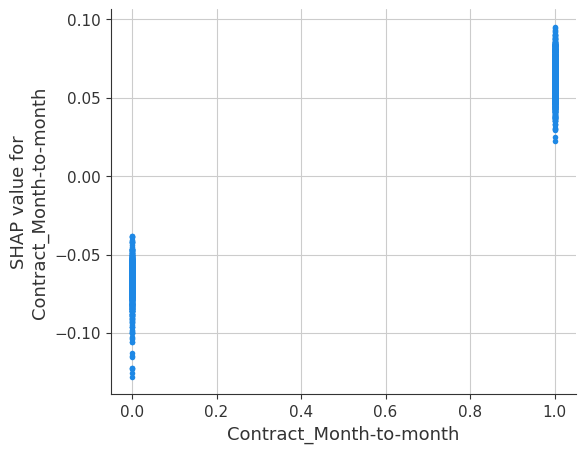

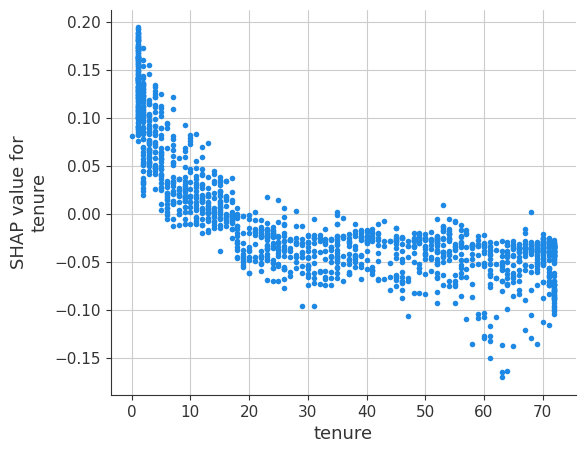

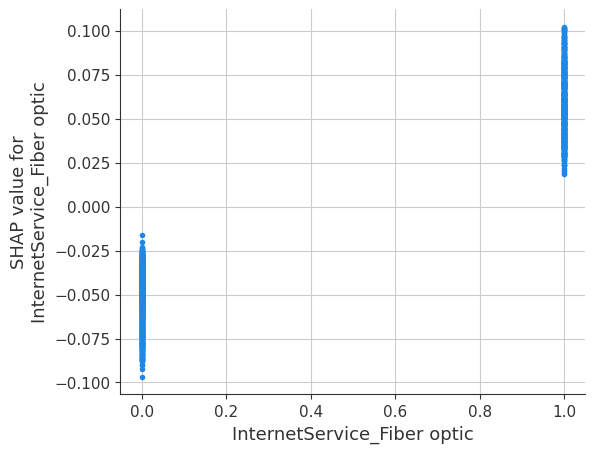

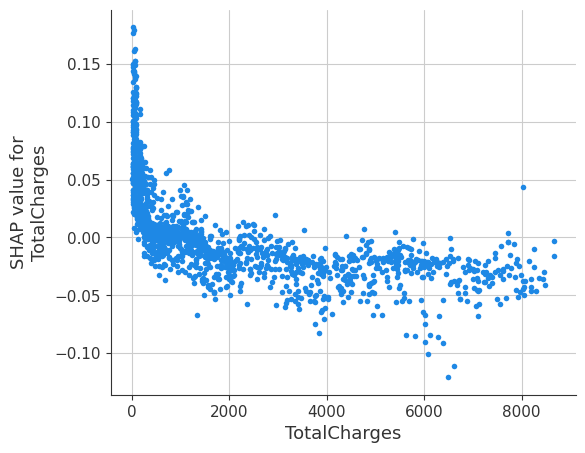

In [ ]:
# Generate SHAP dependence plots for each feature in the top features list to show feature effect on the model output

for feature in top_features:
  shap.dependence_plot(feature, shap_values_for_class_1, samples, interaction_index=None)

**INTERPRETATION**

Based on the SHAP dependence plots, it is clear that clients who churn tend to have the following features:
- Have a month-to-month contract
- Have a tenure less than 10 years
- Have a fiber optic for internet service
- Have total charges that are less than 1000

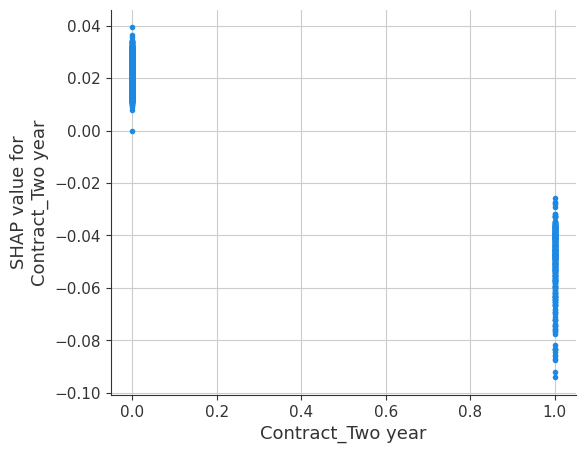

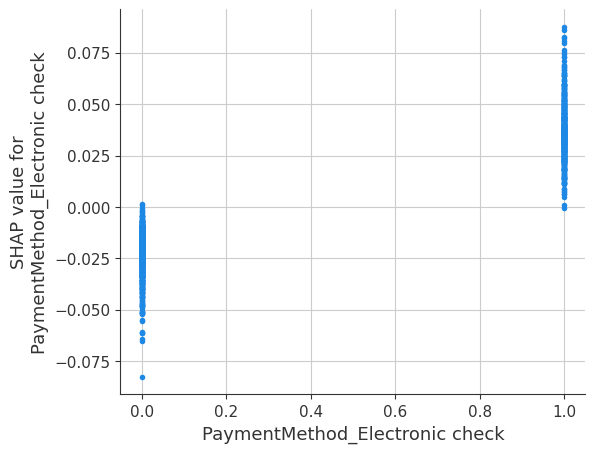

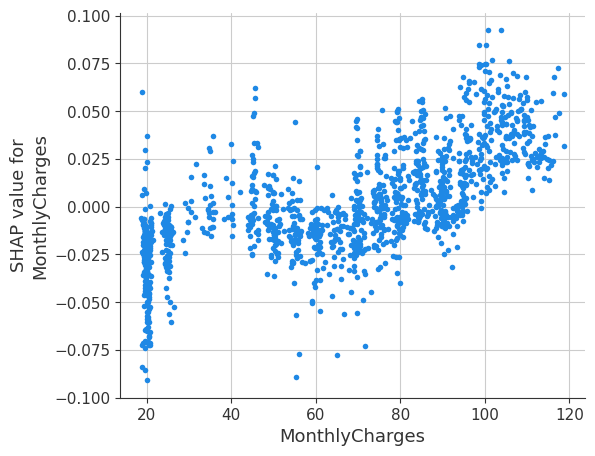

In [ ]:
# Create SHAP dependence plots for each feature in feature_list to visualize the impact of each feature on the prediction for the churned class

for feature in feature_list:
      shap.dependence_plot(feature, shap_values_for_class_1, samples, interaction_index=None)

**INTERPRETATION**

Looking at the features, which are less important, we can say that

- Customers with a two-year contract are generally less likely to churn, while those without such a contract have a higher probability of churning.
- Customers using electronic checks have a higher likelihood of churning, whereas those who use other payment methods are less likely to do so.
- Customers with monthly charges exceeding $60 show a higher rate of churn.

**OVERALL FINDINGS**

The SHAP (SHapley Additive exPlanations) analysis reveals that month-to-month contracts, tenure, fiber optic internet service, total charges, and two-year contracts are key factors driving customer churn.

These results confirm many expected assumptions such as those customers that have less interaction with the telco industry such as through month-to-month contracts and a low number of years of tenure will have a higher likelihood of stopping their use of the services.

However, interestingly, it is a bit counter intuitive that higher churn among fiber optic users and electronic check payers. For fiber optic services which have a premium service, it is unexpected that these services will push customers away. Moreover, the link between electronic check payments and increased churn is also surprising. Electronic checks may typically appeal to customers seeking flexibility, but this might signal lower loyalty, suggesting a need to address preferences around payment options.

An interesting weakness in the interpretation of results was that it was hard to identify which features in SHAP have the highest importance based on the direction of their influence (positive or negative) on the probability of being classified as churn.

Nevertheless. SHAP enhances model interpretability by pinpointing influential features and highlighting specific customer risks, supporting more targeted retention strategies.

**LIME**

LIME (Local Interpretable Model-agnostic Explanations) is a technique that explains machine learning model predictions by approximating complex models with simpler, interpretable models. LIME focuses on individual predictions, providing insight into why a model made a specific decision for a given data point. It is model-agnostic, meaning it can be applied to any machine learning model. LIME works by altering the data, generating a local dataset, and training an interpretable model (e.g., a decision tree) to mimic the behavior of the original model. This helps identify the most influential features driving the prediction.

In [ ]:
# Install and import the LIME package and its tabular explainer for interpreting predictions on tabular data

!pip install lime
import lime
import lime.lime_tabular

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=dea665c1e7453b90d1fa0b581ed158a1f74fe809b1f3bfe8fbd1e8d0f96123fd
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


To identify the top features impacting the model's predictions using LIME, the following steps were taken:

1. Feature Importance Weights
 * LIME generates feature importance weights by showing how much each feature contributes to the model's prediction for a specific instance.
 * The exp.as_list() method provides the features with the largest influence on the predicted outcome, helping us pinpoint the most important features for that instance.

2. Explanation Table in Notebook
 * LIME displays feature contributions in a table format using exp.show_in_notebook(show_table=True).
 * This helps visualize the exact contributions of each feature to the prediction, making it easier to identify which features are the most influential in determining the model's output.

3. Comparing Feature Contributions Across Multiple Instances
 * By explaining the predictions for multiple test instances (e.g., the 3rd and 5th instances) and comparing the top features identified in each explanation, we can assess which features consistently have the greatest impact across different predictions.
 * This comparison helps to further confirm the key features influencing the model’s overall performance.

In [ ]:
# Initialize a LIME explainer for tabular data to interpret individual predictions, using training data and feature names

explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(),
                                                  class_names=['Churn'], verbose=True, mode='regression')

In [ ]:
# Explain the prediction for the 1st instance in the test set using LIME, showing the top 5 contributing features

j = 1
exp = explainer.explain_instance(X_test.values[j], randomforest_model.predict, num_features=5)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.026462265066811742
Prediction_local [0.00048361]
Right: 0


In [ ]:
# Return the LIME explanation as a list of feature contributions and their corresponding weights

exp.as_list()

[('InternetService_Fiber optic <= 0.00', -0.0645633167104057),
 ('0.00 < Contract_Month-to-month <= 1.00', 0.061005715607218305),
 ('Contract_Two year <= 0.00', 0.03043138111312559),
 ('29.00 < tenure <= 55.00', -0.029279443515484907),
 ('InternetService_No > 0.00', -0.023572988423320927)]

In [ ]:
# Display the LIME explanation for the 1st instance in the notebook, showing the table of feature contributions

exp.show_in_notebook(show_table=True)

**INTERPRETATION**

1. For the first instance, the LIME output predicts a non-churn result (0) , meaning the customer is not likely to discontinue the service provided by the internet provider. The top 5 features are InternetService_Fiber optic, Contract_Two year, tenue, monthly chargers, Contract_month to month.

2. Among the top 5 features, InternetService_Fiber optic with a value of 0 suggests that the absence of this service contribute significantly to reducing churn risk. Month to month contracts slight increases churn with a positive value of 1. However it might not be strong indicator that influences customer to churn a service. A tenue of 29 to 55 and a value of 41 postively impacts rentention, showcasing the importance of loyalty in retaining customers.







In [ ]:
# Explain the prediction for the 3rd instance in the test set, showing the top 5 contributing features

j = 3
exp = explainer.explain_instance(X_test.values[j], randomforest_model.predict, num_features=5)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept -0.0836296776770819
Prediction_local [0.19033886]
Right: 1


In [ ]:
# Return the LIME explanation as a list of feature contributions and their corresponding weights

exp.as_list()

[('tenure <= 9.00', 0.07432439024601036),
 ('0.00 < InternetService_Fiber optic <= 1.00', 0.059387579734274755),
 ('0.00 < Contract_Month-to-month <= 1.00', 0.05848426797027028),
 ('TotalCharges <= 406.27', 0.04624738167462327),
 ('Contract_Two year <= 0.00', 0.03552491680415216)]

In [ ]:
# Display the LIME explanation for the 3rd instance in the notebook, showing the table of feature contributions

exp.show_in_notebook(show_table=True)

**INTERPRETATION**

1. For the third instance, the lime predicts a moderate likelihood of churn. The top 5 features are tenure, InternetService_Fiber optic, Total Charges, and Contracts.

2. A <= 0.9 tenure indicates that a customer is relatively new to the internet provider's service which may increase the likelihood of churn as they might feel not committed yet in investing the service. Moreover, having fiber optic connection appears to be a factor that positively contribute to churn with a value of 1.00 which indicates disatisfaction of customers from the internet service. Moreover, customers on month-to-month contracts have a high tendency to churn as they have more freedom to switch internet providers. As for tenure, customers that have longer relationships with the company are less likely to churn.

3. If we were to compare the results of the third instance with the 1st instance, we could suggest that the internet service company has issues with its fiber optic connection plan as it could lead to higher churn risk.

In [ ]:
# Explain the prediction for the 5th instance in the test set, showing the top 5 contributing features

j = 5
exp = explainer.explain_instance(X_test.values[j], randomforest_model.predict, num_features=5)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept -0.05437484251022323
Prediction_local [0.07246281]
Right: 0


In [ ]:
# Return the LIME explanation as a list of feature contributions and their corresponding weights

exp.as_list()

[('0.00 < InternetService_Fiber optic <= 1.00', 0.056805257357595125),
 ('0.00 < Contract_Month-to-month <= 1.00', 0.05199813237805101),
 ('tenure > 55.00', -0.03324368879572256),
 ('Contract_Two year <= 0.00', 0.026338900561767253),
 ('InternetService_No <= 0.00', 0.024939051199273553)]

In [ ]:
# Display the LIME explanation for the 5th instance in the notebook, showing the table of feature contributions

exp.show_in_notebook(show_table=True)

**INTERPRETATION**

1. For the fifth instance, the lime model predicts a low churn probability with a value of 0.056. The top 5 highlighted features of the model are InternetService_Fiber optic, Contract_Month to Month, tenure, Contract_Two year, Total Charges.

2. In this instance, having fiber optic connection increases the likelihood of churn, suggesting that customers subscribed to this connection are more prone to service and connectivity issues not meeting their standards, influencing their decision to continue or discontinue the service, which is the opposite in having two year contracts. Moreover, customers on month-to-month contracts have a high tendency to churn as they have more freedom to switch internet providers. As for tenure, customers that have longer relationships with the company are less likely to churn. Overall, the combination suggests, that long-standing customer relationship and well structured contracts increases retention whule fiber optic users and shorter contracts may have higher churn sensitivities.

**OVERALL FINDINGS**

Based on the LIME findings from the first, third, and fifth instances, tenurem type of InternetService, type of Contract and total chargers consistently emerges as the significant features of the model. It shows that fiber optic service raises the likelihood of customer churn as a result of the service's high cost and unfulfilled customer expectations, suggesting the company to improve its fiber optic offerings and address customer concerns. Moreover, monthly contracts and high total charges can increase the likelihood of churn which may indicate that customers dont want to spend high amounts of charges in a short period of time especially if the service does not meet their expectations.  On the other hand, longer term contracts and tenure emerges as the features that significantly reduces churn, indicating that term commitments and established customer relationship fosters customer rention and loyalty, suggesting that in order for the company to continually retain its customer base, the company should focus on offerring well structured long term plans and loyaly programs to retain their customer base.

**PDP**

A Partial Dependence Plot (PDP) is another model explainability that visualizes how a feature or a combination of features influences model predictions, while keeping other features constant. It works by averaging predictions over the distribution of other features, known as marginalization or ceteris paribus. For a single feature, a line plot shows its impact, while for two features, a surface plot is used. PDPs help interpret complex models by revealing the relationship between features and the target variable.

In [ ]:
#import necessary packages
from sklearn.inspection import PartialDependenceDisplay

To identify the top features impacting the PDP model's predictions, the following steps and visualizations took place:
1. Feature Importance Scores
 * calculated the feature importance scores from the trained model (randomforest_model.feature_importances_), which rank the features based on their contribution to the model’s predictions.
2. Partial Dependence Plot (PDP) for Top Features
 * generate and visualize the PDPs for these top features.
 * this method allows us to observe the relationship between the top features and the predicted outcome while holding other features constant.
3. Manually Calculating PDP for Each Feature
 * manually calculated the Partial Dependence for a given feature using a custom function (calculate_pdp).
 * This method involves iterating through the feature’s range of values, making predictions with each value, and then plotting the resulting PDP to observe its effect on the model’s output.

In [ ]:
#This function to create PDP plots for the top features in the model.
def make_pdp_plot(model, X_train, top_features, feature_names, grid_resolution=50, n_jobs=3):

    #Create the PartialDependenceDisplay
    fig, ax = plt.subplots(figsize = (15, 8))

    #Plot Partial Dependence for selected top features
    display = PartialDependenceDisplay.from_estimator(model, X_train, features = top_features, feature_names = feature_names, grid_resolution = grid_resolution, n_jobs = n_jobs)
    display.plot(ax = ax)
    plt.suptitle('Partial Dependence Plots (PDPs) for Top Features', fontsize = 16)
    plt.subplots_adjust(top = 0.9)
    plt.show()

In [ ]:
# List of top features to create PDP plots for
top_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract_One year', 'InternetService_Fiber optic']

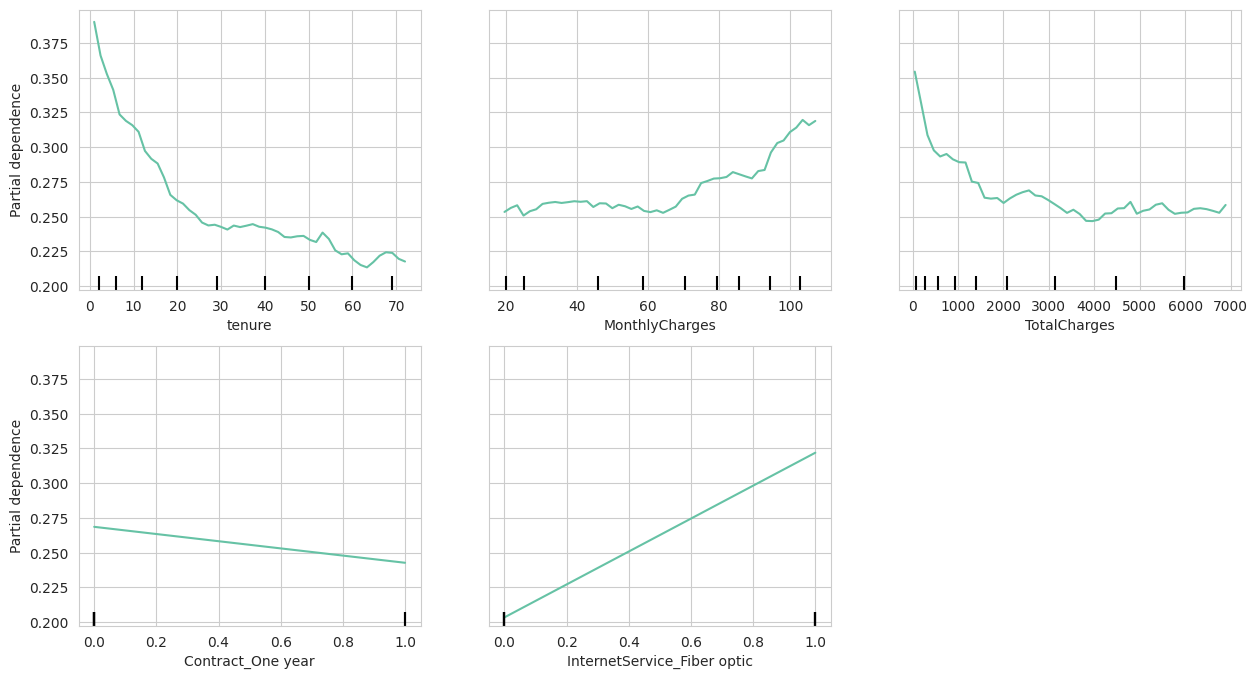

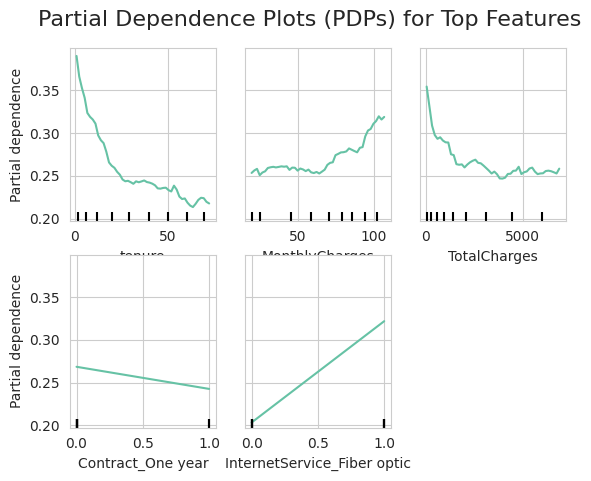

In [ ]:
# Call the function to generate PDPs for the selected top features
make_pdp_plot(randomforest_model, X_train, top_features, X_train.columns)

*1. Feature Importance Scores*

In [ ]:
importances = randomforest_model.feature_importances_

#Create a DataFrame to pair feature names with their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

#Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by = 'Importance', ascending = False)

#Print the top 5 important features
print("Top 5 Features by Importance:")
print(feature_importance_df.head())

Top 5 Features by Importance:
                        Feature  Importance
14                 TotalCharges    0.178357
13               MonthlyCharges    0.166111
4                        tenure    0.156920
18      Contract_Month-to-month    0.064537
16  InternetService_Fiber optic    0.040523


*2. Partial Dependence Plot (PDP) for Top Features*

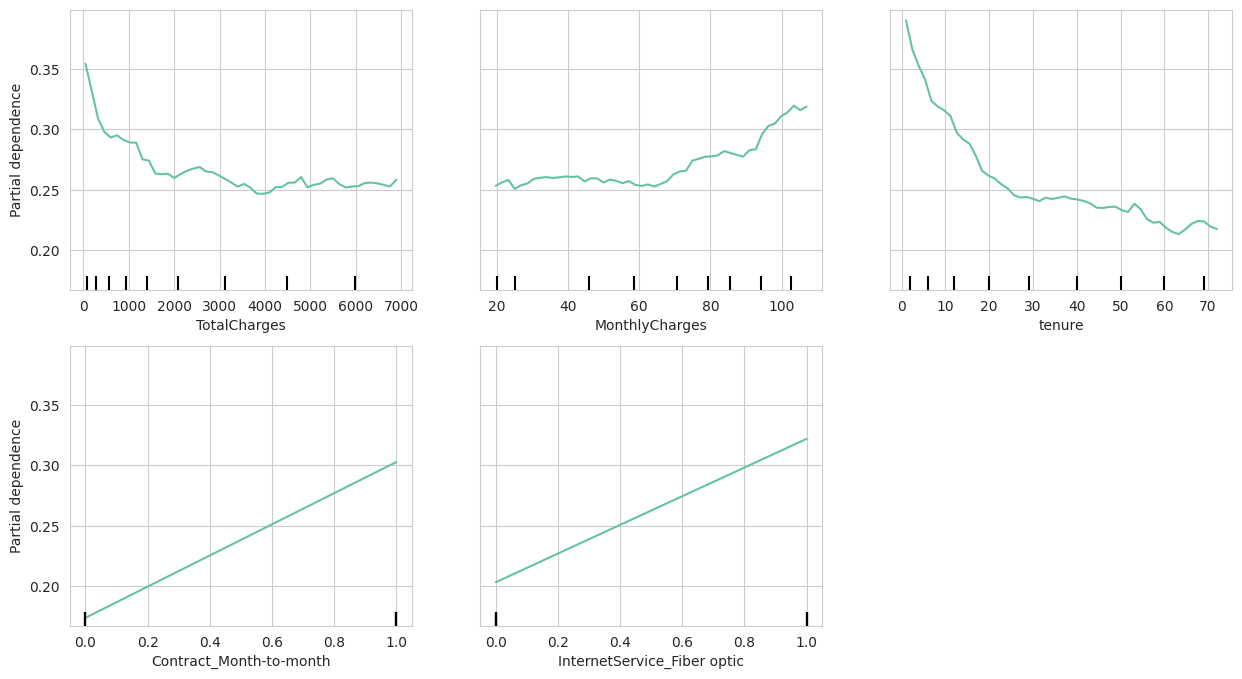

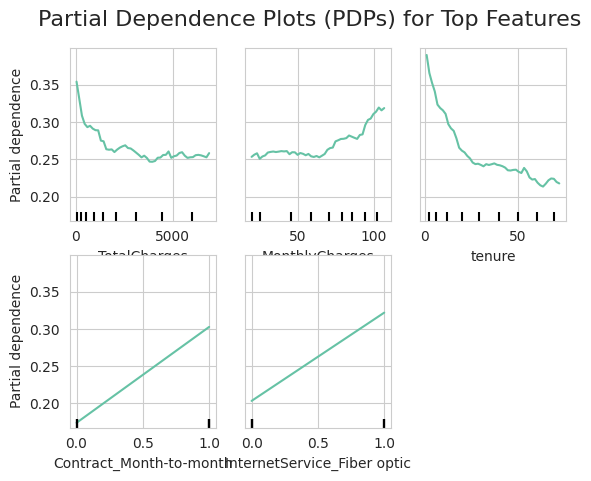

In [ ]:
#List of the top features to plot (dynamic selection based on importance)
top_features = feature_importance_df['Feature'].head(5).tolist()

#Plotting PDP for the top 5 most important features
make_pdp_plot(randomforest_model, X_train, top_features, X_train.columns)

*3. Manually Calculating PDP for Each Feature*

In [ ]:
#This function is used to manually calculate the Partial Dependence (similar to an explainer)
def calculate_pdp(model, X_train, feature, grid_resolution=50):

    #Get the range of the feature values
    feature_values = np.linspace(X_train[feature].min(), X_train[feature].max(), grid_resolution)

    #Initialize an array to store the average predictions
    avg_predictions = []

    #Loop over the feature values and calculate the model's prediction for each
    for value in feature_values:
        #Create a copy of the dataset and set the feature to the current value
        X_copy = X_train.copy()
        X_copy[feature] = value

        #Get the model's predictions for the modified dataset
        preds = model.predict_proba(X_copy)[:, 1]  # Probability of class 1 (churn = 1)

        #Calculate the average prediction for this feature value
        avg_predictions.append(np.mean(preds))

    return feature_values, np.array(avg_predictions)

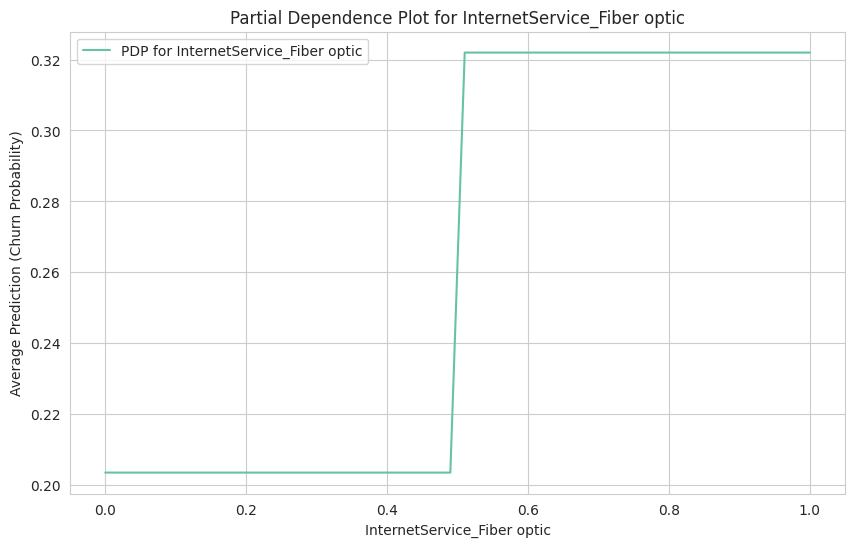

In [ ]:
#This function is for plotting the Partial Dependence Plot for a single feature.
def plot_pdp_explainer(model, X_train, feature, grid_resolution=50):

    #Get the PDP values using the custom explainer
    feature_values, avg_predictions = calculate_pdp(model, X_train, feature, grid_resolution)

    #Plot the PDP
    plt.figure(figsize = (10, 6))
    plt.plot(feature_values, avg_predictions, label=f'PDP for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Average Prediction (Churn Probability)')
    plt.title(f'Partial Dependence Plot for {feature}')
    plt.grid(True)
    plt.legend()
    plt.show()

#Example usage: Calculating the PDP for a feature
plot_pdp_explainer(randomforest_model, X_train, 'InternetService_Fiber optic')

**INTERPRETATION**

For the top features identified by PDP which are TotalCharges, MonthlyCharges, tenure, Contract_Month-to-month, and InternetService_Fiber optic, the model provides some insights as to how each feature affects customer churn probability.

TotalCharges: The PDP shows a non-linear relationship with churn probability. Initially, churn probability is relatively high when TotalCharges is 0, which has a value of 0.36. However, as TotalCharges increases, churn probability decreases slightly, suggesting that customers with higher total spending might be more engaged or satisfied with the service. It is also important to note that the trend slowly rises as the value of TotalCharges becomes 4000 onwards. This pattern implies that low spending customers are potentially more likely to leave.

MonthlyCharges: Unlike TotalCharges, MonthlyCharges instantly shows a positive correlation with churn probability. Higher monthly charges are associated with an increased likelihood of churn, indicating that cost-sensitive customers might be affected by high ongoing expenses.

Tenure: The PDP indicates a negative relationship with churn probability, showing that customers with longer tenure are less likely to churn. This suggests that customer loyalty strengthens over time, with longer-term customers exhibiting reduced churn risk.

Contract_Month-to-month: Customers on month-to-month contracts show a high churn probability value of 0.30, which could be due to the flexibility of their contract, enabling them to leave without significant commitment.

InternetService_Fiber optic: The churn probability for fiber-optic customers is very similar to the month-to-month feature, but with a churn probability value of 0.32 instead of 0.30. This could be because of dissatisfaction of the internet service provider.

**OVERALL FINDINGS**

The PDP analysis shows that the TotalCharges feature had an unexpected trend with churn than initially expected. When comparing it to MonthlyCharges which you would expect to be pretty similar, TotalCharges had a trend where the churn probability decreases as the total spending increases. On the other hand, MonthlyCharge,Contract_Month-to-month, and InternetService_Fiber optic directly elevate churn risk, while the tenure feature shows retention among customers the longer they stay.

These findings suggest that customer loyalty programs or benefits tied to tenure could help reduce churn rate. Strategies could also be implemented for dissatisfaction towards month-to-month plans and fiber-optic services in order to further reduce churn.

The explanations align with common telco churn patterns. Some of the features like MonthlyCharges and Contract_Month-to-month showing higher churn risk are usually what's observed with industry observations that have high ongoing costs and flexible contracts resulting to increasing churn probability. Similarly, the negative relationship between tenure and churn probability aligns with the idea that longer relationships foster customer loyalty. However, as mentioned above, the insight regarding lower churn risk for customers with higher TotalCharges offers a new perspective, indicating that high spenders may feel more invested in the service.

# **Summary of Analysis & Reporting**

In our analysis, we used SHAP, LIME, and PDP to explain customer churn predictions with a Random Forest model.

**SHAP** identified key features influencing churn, including **month-to-month contracts**, **tenure**, **fiber optic services**, and **total charges**. It revealed that shorter tenures and fiber optic services, despite being premium offerings, were linked to higher churn. **LIME**, which focuses on individual predictions, also highlighted **fiber optic services** and **tenure** as significant churn predictors, with dissatisfaction about fiber optic services being a possible cause. PDP visualized the non-linear relationship between **total charges** and churn, showing lower churn for customers with higher spending.

**Tenure** consistently emerged as a predictor of lower churn, as customers with longer tenures were less likely to leave. Common trends across all methods showed that **month-to-month contracts**, low **tenure**, and dissatisfaction with **fiber optic services** were significant churn drivers.

There are a few unexpected patterns in the results, particularly regarding the relationship between **fiber optic services** and churn, as well as the behavior of **total charges**. Despite being a premium offering, **fiber optic services** were consistently associated with higher churn across all three techniques (SHAP, LIME, and PDP). Moreover, surprisingly, customers with **lower total charges** were more likely to churn, while those with higher charges had a lower likelihood of churning. This suggests that customers who have already invested more in the service may be less likely to leave, possibly due to higher perceived value or a reluctance to move away from a service they’ve paid for extensively.

To reduce churn, companies should focus on **improving customer satisfaction** with fiber optic services, promote **long-term contracts**, and implement **loyalty-building strategies** tied to tenure. These findings highlight the importance of addressing service dissatisfaction and fostering long-term commitments to enhance customer retention.